In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression

C:\Users\SBS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
#Phase 1 : Analyse Explorstoire 

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
#remplacer "presence" -> 1 et "absence" -> 0
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})

In [7]:
#Nettoyer les donnees
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

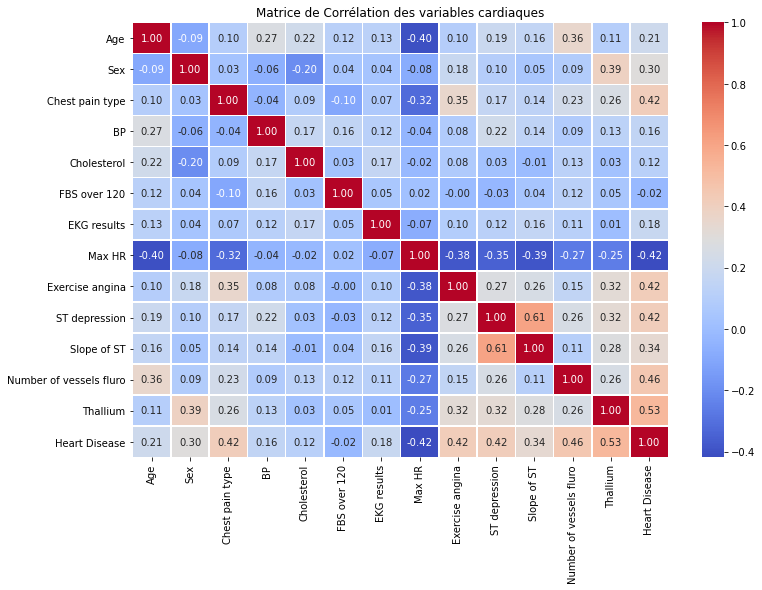

In [8]:
#visualiser les donnees
# 1. Calculer la matrice de corrélation
# On utilise uniquement les colonnes numériques
corr_matrix = df.corr()

# 2. Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# 3. Créer la Heatmap avec Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matrice de Corrélation des variables cardiaques")
plt.show()

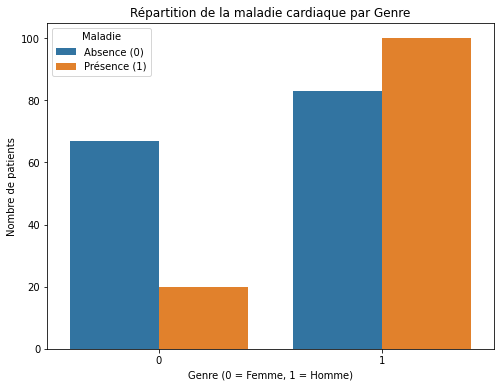

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# On crée un graphique qui compte les présences/absences par sexe
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Heart Disease', data=df)

plt.title('Répartition de la maladie cardiaque par Genre')
plt.xlabel('Genre (0 = Femme, 1 = Homme)')
plt.ylabel('Nombre de patients')
plt.legend(title='Maladie', labels=['Absence (0)', 'Présence (1)'])
plt.show()

In [10]:
# Affiche le % de maladie pour chaque genre
print(df.groupby('Sex')['Heart Disease'].mean() * 100)

Sex
0    22.988506
1    54.644809
Name: Heart Disease, dtype: float64


In [11]:
#phase 2: preprocesss and machine learning

In [12]:
#separer la target des autres features
X = df.drop("Heart Disease", axis = 1).values
Y = df["Heart Disease"].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#on separe les donnees de test et les donnes d'entrainement 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [15]:
model = LogisticRegression(max_iter = 2000)

In [16]:
model.fit(X_train, y_train) 

LogisticRegression(max_iter=2000)

In [17]:
#prediction sur le dataset de test
y_pred = model.predict(X_test)

In [18]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

Précision : 0.91

Tableau de performance :
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



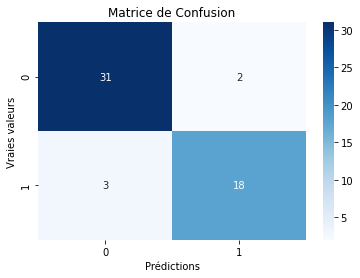

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Score de précision globale
print(f"Précision : {accuracy_score(y_test, y_pred):.2f}")

# Rapport détaillé (Précision, Rappel, F1-score)
print("\nTableau de performance :")
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()

In [21]:
import pickle

# Sauvegarde le modèle sur ton disque
with open('modele_cardiaque.pkl', 'wb') as f:
    pickle.dump(model, f)